In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
from PIL import Image
import numpy as np
import re
from collections import Counter

In [2]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

Iniciando exploración del dataset Fashion Product Images (Small)
Información básica del dataset:
Número total de productos: 44424

Columnas disponibles:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

Mostrando imágenes de ejemplo:


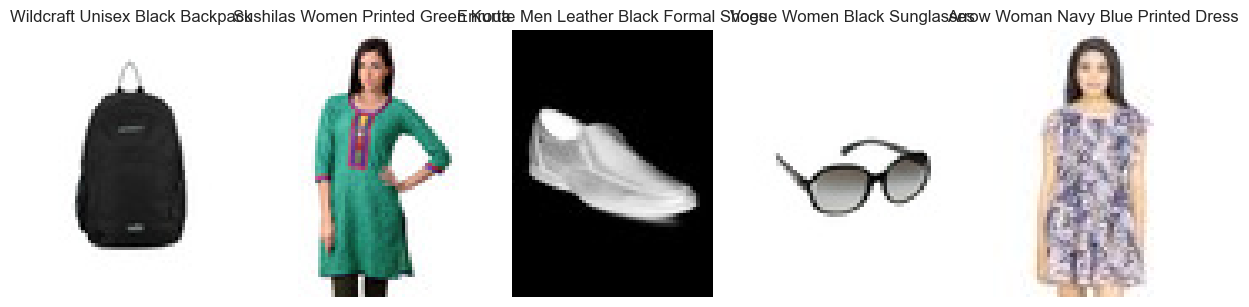


Analizando nombres de productos...
Palabras clave más comunes en los nombres de productos:
men: 21619
women: 15217
black: 9678
shirt: 7599
blue: 6596
white: 5803
t: 5494
shoes: 4087
s: 3816
printed: 3437
brown: 3242
red: 3102
grey: 3044
watch: 2413
nike: 2326
green: 2320
casual: 2297
of: 2111
puma: 2102
adidas: 2081

Analizando patrones de uso...
Distribución de patrones de uso:
usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64


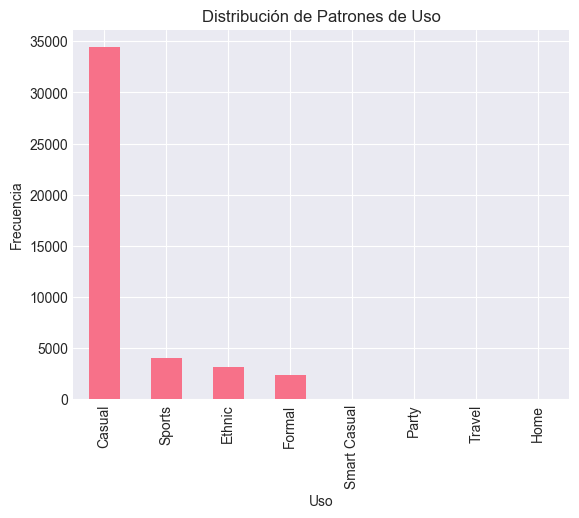

In [3]:
def explore_csv():
    """Exploración del archivo styles.csv"""
    # Ruta al archivo CSV
    file_path = Path('../data/raw/styles.csv')
    
    # Verificar si el archivo existe
    if not file_path.exists():
        print(f"El archivo {file_path} no existe.")
        return None

    try:
        # Cargar el archivo CSV ignorando las líneas problemáticas
        df = pd.read_csv(file_path, on_bad_lines='skip')
    except pd.errors.ParserError as e:
        print(f"Error al analizar el archivo CSV: {e}")
        return None

    # Información básica del dataset
    print("Información básica del dataset:")
    print(f"Número total de productos: {len(df)}")
    print("\nColumnas disponibles:")
    print(df.columns.tolist())
    
    return df

def show_example_images(df, image_dir, num_images=5):
    """Mostrar imágenes de ejemplo del dataset"""
    # Seleccionar algunas filas aleatorias del DataFrame
    sample_df = df.sample(n=num_images)
    
    # Crear una figura para mostrar las imágenes
    plt.figure(figsize=(15, 10))
    
    for i, row in enumerate(sample_df.itertuples()):
        # Ruta a la imagen
        image_path = Path(image_dir) / f"{row.id}.jpg"
        
        # Verificar si la imagen existe
        if image_path.exists():
            # Cargar y mostrar la imagen
            img = Image.open(image_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(row.productDisplayName)
            plt.axis('off')
        else:
            print(f"Imagen no encontrada: {image_path}")
    
    plt.show()

def analyze_product_names(df):
    """Analizar nombres de productos"""
    # Llenar valores NaN con una cadena vacía y convertir todos los valores a cadenas
    df['productDisplayName'] = df['productDisplayName'].fillna('').astype(str)
    
    # Extraer palabras clave de los nombres de productos
    words = ' '.join(df['productDisplayName']).lower()
    words = re.findall(r'\w+', words)
    word_freq = Counter(words).most_common(20)
    
    print("Palabras clave más comunes en los nombres de productos:")
    for word, freq in word_freq:
        print(f"{word}: {freq}")

def analyze_usage(df):
    """Analizar patrones de uso"""
    # Ejemplo de análisis de patrones de uso
    usage_counts = df['usage'].value_counts()
    
    print("Distribución de patrones de uso:")
    print(usage_counts)
    
    # Visualizar la distribución de patrones de uso
    usage_counts.plot(kind='bar')
    plt.title('Distribución de Patrones de Uso')
    plt.xlabel('Uso')
    plt.ylabel('Frecuencia')
    plt.show()

def main():
    print("Iniciando exploración del dataset Fashion Product Images (Small)")
    
    # Explorar CSV y obtener DataFrame
    df = explore_csv()
    
    if df is not None:
        # Mostrar imágenes de ejemplo
        print("\nMostrando imágenes de ejemplo:")
        show_example_images(df, '../data/raw/images', num_images=5)
        
        # Analizar nombres de productos
        print("\nAnalizando nombres de productos...")
        analyze_product_names(df)
        
        # Analizar patrones de uso
        print("\nAnalizando patrones de uso...")
        analyze_usage(df)

if __name__ == "__main__":
    main()

Iniciando exploración del dataset Fashion Product Images (Small)
Información básica del dataset:
Número total de productos: 44424

Columnas disponibles:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']


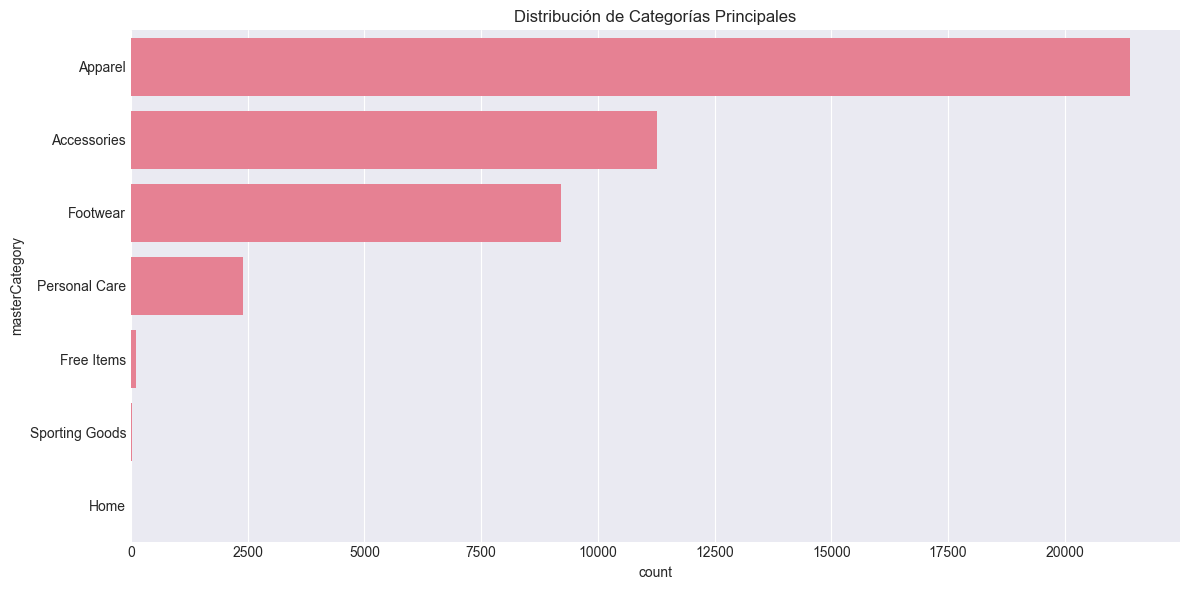

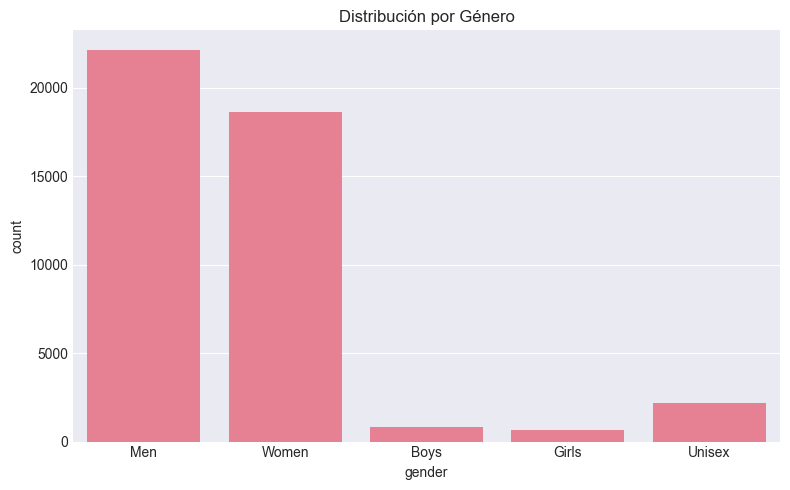

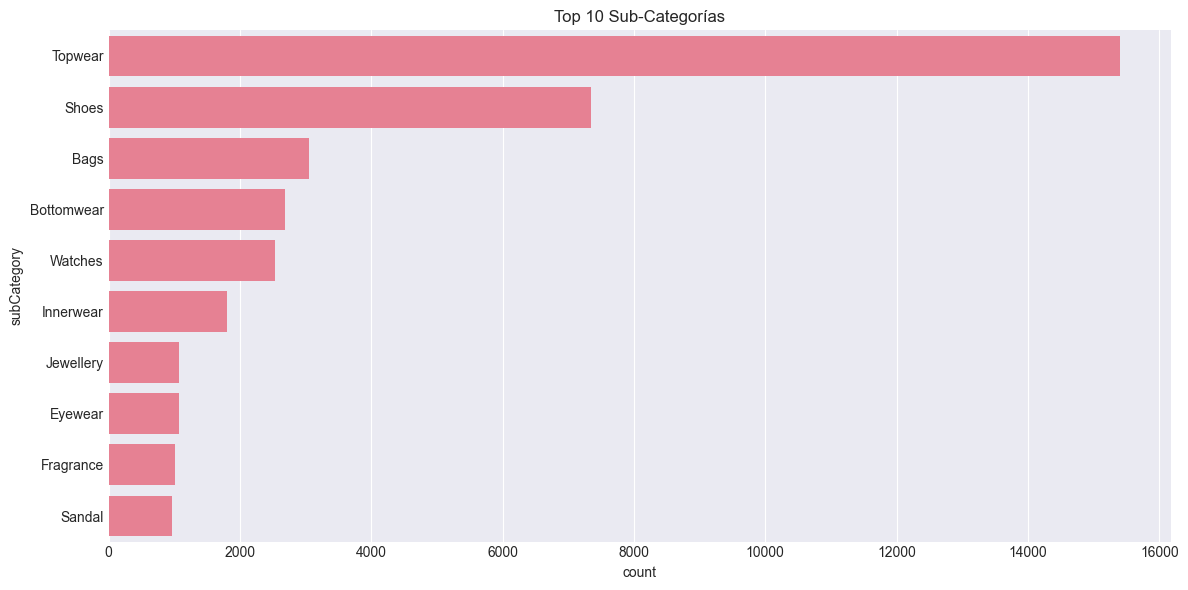

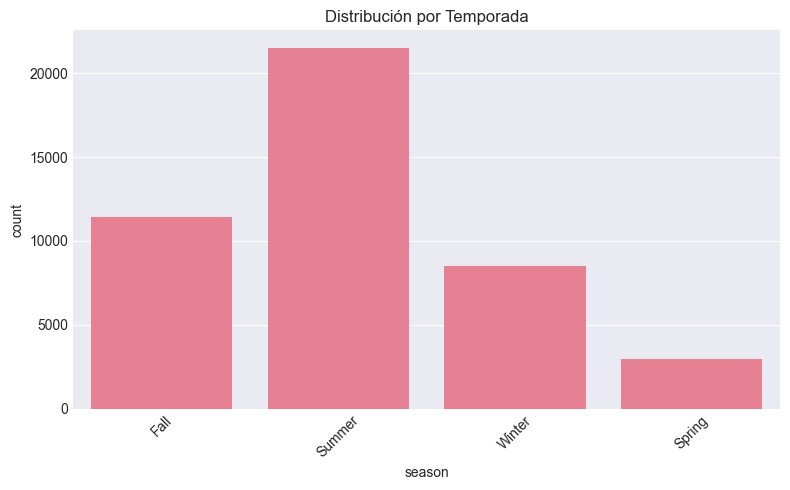


Estadísticas del Dataset:

Número de categorías principales: 7
Número de sub-categorías: 45
Número de tipos de artículos: 143

Top 5 categorías principales:
masterCategory
Apparel          21397
Accessories      11274
Footwear          9219
Personal Care     2403
Free Items         105
Name: count, dtype: int64

Mostrando imágenes de ejemplo:


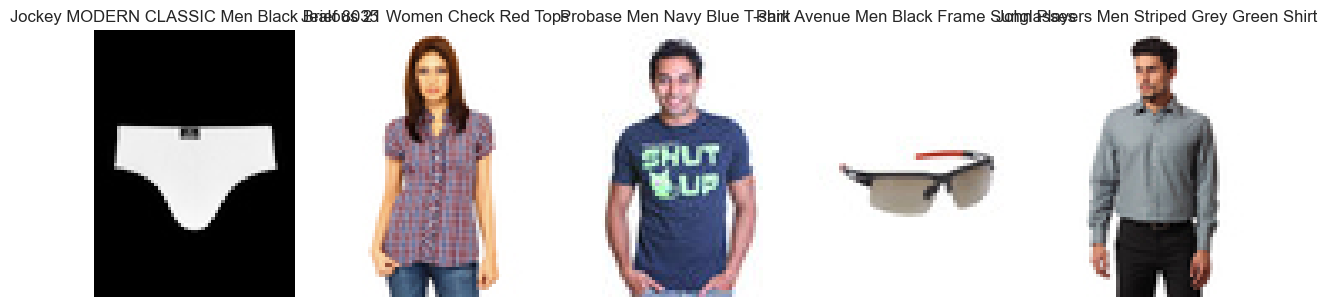

In [4]:
def analyze_categories(df):
    """Analizar las distribuciones de las diferentes categorías"""
    # Configurar el estilo de las gráficas
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # 1. Distribución de masterCategory
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='masterCategory', order=df['masterCategory'].value_counts().index)
    plt.title('Distribución de Categorías Principales')
    plt.tight_layout()
    plt.show()

    # 2. Distribución de gender
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='gender')
    plt.title('Distribución por Género')
    plt.tight_layout()
    plt.show()

    # 3. Top 10 subCategory
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='subCategory', 
                 order=df['subCategory'].value_counts().nlargest(10).index)
    plt.title('Top 10 Sub-Categorías')
    plt.tight_layout()
    plt.show()

    # 4. Distribución por season
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='season')
    plt.title('Distribución por Temporada')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Imprimir algunas estadísticas
    print("\nEstadísticas del Dataset:")
    print(f"\nNúmero de categorías principales: {df['masterCategory'].nunique()}")
    print(f"Número de sub-categorías: {df['subCategory'].nunique()}")
    print(f"Número de tipos de artículos: {df['articleType'].nunique()}")
    print(f"\nTop 5 categorías principales:")
    print(df['masterCategory'].value_counts().head())

def main():
    print("Iniciando exploración del dataset Fashion Product Images (Small)")
    
    # Explorar CSV y obtener DataFrame
    df = explore_csv()
    
    if df is not None:
        # Analizar categorías
        analyze_categories(df)
        
        # Mostrar imágenes de ejemplo
        print("\nMostrando imágenes de ejemplo:")
        show_example_images(df, '../data/raw/images', num_images=5)

if __name__ == "__main__":
    main()

In [5]:
def analyze_category_relationships(df):
    """Analizar relaciones entre masterCategory, subCategory y articleType"""
    # Crear visualización de la jerarquía de categorías
    plt.figure(figsize=(15, 8))
    
    # Seleccionar una masterCategory específica para visualizar
    category = 'Apparel'  # podemos cambiar esto para ver otras categorías
    subset = df[df['masterCategory'] == category]
    
    # Mostrar las subCategory para esta masterCategory
    sns.countplot(data=subset, y='subCategory', 
                 order=subset['subCategory'].value_counts().head(10).index)
    plt.title(f'Top 10 Sub-Categorías para {category}')
    plt.show()

    # Mostrar la relación entre subCategory y articleType
    print(f"\nEjemplos de tipos de artículos en {category}:")
    for sub_cat in subset['subCategory'].unique():
        articles = df[df['subCategory'] == sub_cat]['articleType'].unique()
        print(f"\n{sub_cat}:")
        print(", ".join(articles[:5]))  # Mostrar solo los primeros 5 tipos

In [6]:
def analyze_colors(df):
    """Analizar la distribución de colores por categoría"""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='baseColour', 
                 order=df['baseColour'].value_counts().head(10).index)
    plt.title('Top 10 Colores más Comunes')
    plt.show()

    # Mostrar colores por categoría principal
    plt.figure(figsize=(15, 8))
    color_by_category = pd.crosstab(df['masterCategory'], df['baseColour'])
    sns.heatmap(color_by_category, cmap='YlOrRd', annot=True, fmt='d', 
                cbar_kws={'label': 'Cantidad'})
    plt.title('Distribución de Colores por Categoría')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
def analyze_temporal_patterns(df):
    """Analizar patrones temporales en el dataset"""
    # Distribución por año
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='year')
    plt.title('Distribución por Año')
    plt.show()

    # Relación entre temporada y categoría
    season_category = pd.crosstab(df['season'], df['masterCategory'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(season_category, cmap='YlOrRd', annot=True, fmt='d')
    plt.title('Categorías por Temporada')
    plt.show()

Iniciando exploración del dataset Fashion Product Images (Small)
Información básica del dataset:
Número total de productos: 44424

Columnas disponibles:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

Mostrando imágenes de ejemplo:


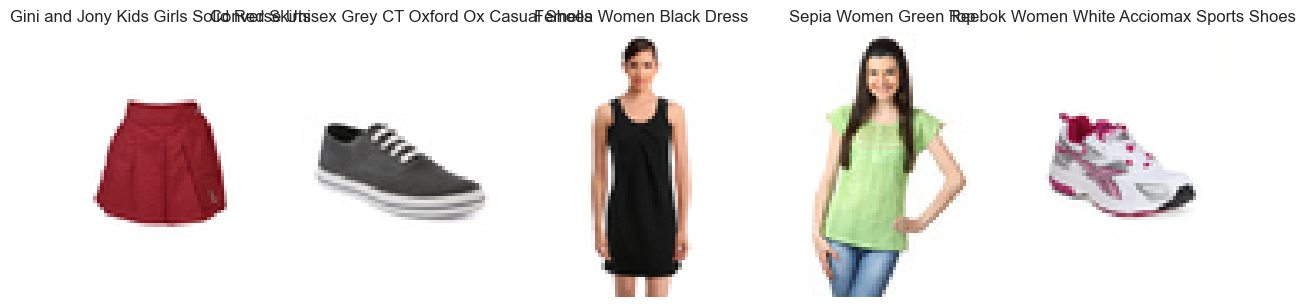


Analizando nombres de productos...
Palabras clave más comunes en los nombres de productos:
men: 21619
women: 15217
black: 9678
shirt: 7599
blue: 6596
white: 5803
t: 5494
shoes: 4087
s: 3816
printed: 3437
brown: 3242
red: 3102
grey: 3044
watch: 2413
nike: 2326
green: 2320
casual: 2297
of: 2111
puma: 2102
adidas: 2081

Analizando patrones de uso...
Distribución de patrones de uso:
usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64


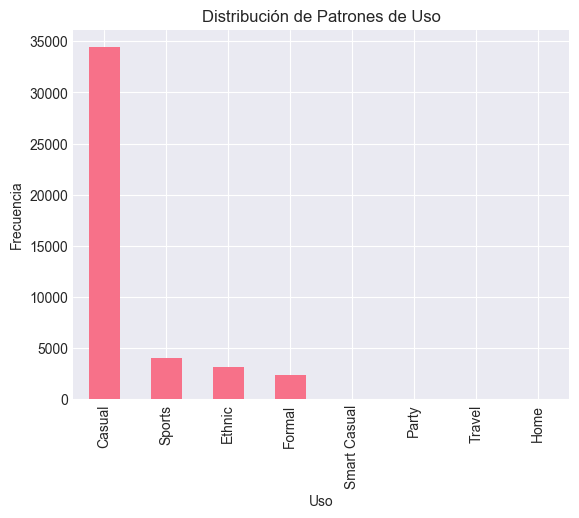

In [8]:
def analyze_product_names(df):
    """Analizar nombres de productos"""
    # Llenar valores NaN con una cadena vacía y convertir todos los valores a cadenas
    df['productDisplayName'] = df['productDisplayName'].fillna('').astype(str)
    
    # Extraer palabras clave de los nombres de productos
    words = ' '.join(df['productDisplayName']).lower()
    words = re.findall(r'\w+', words)
    word_freq = Counter(words).most_common(20)
    
    print("Palabras clave más comunes en los nombres de productos:")
    for word, freq in word_freq:
        print(f"{word}: {freq}")

def main():
    print("Iniciando exploración del dataset Fashion Product Images (Small)")
    
    # Explorar CSV y obtener DataFrame
    df = explore_csv()
    
    if df is not None:
        # Mostrar imágenes de ejemplo
        print("\nMostrando imágenes de ejemplo:")
        show_example_images(df, '../data/raw/images', num_images=5)
        
        # Analizar nombres de productos
        print("\nAnalizando nombres de productos...")
        analyze_product_names(df)
        
        # Analizar patrones de uso (ejemplo)
        print("\nAnalizando patrones de uso...")
        analyze_usage(df)

if __name__ == "__main__":
    main()

In [9]:
def analyze_usage(df):
    """Analizar los patrones de uso de los productos"""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='usage', 
                 order=df['usage'].value_counts().index)
    plt.title('Distribución por Tipo de Uso')
    plt.show()

    # Uso por categoría principal
    usage_category = pd.crosstab(df['usage'], df['masterCategory'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(usage_category, cmap='YlOrRd', annot=True, fmt='d')
    plt.title('Uso por Categoría Principal')
    plt.show()

Iniciando análisis detallado del dataset
Información básica del dataset:
Número total de productos: 44424

Columnas disponibles:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

Analizando relaciones entre categorías...


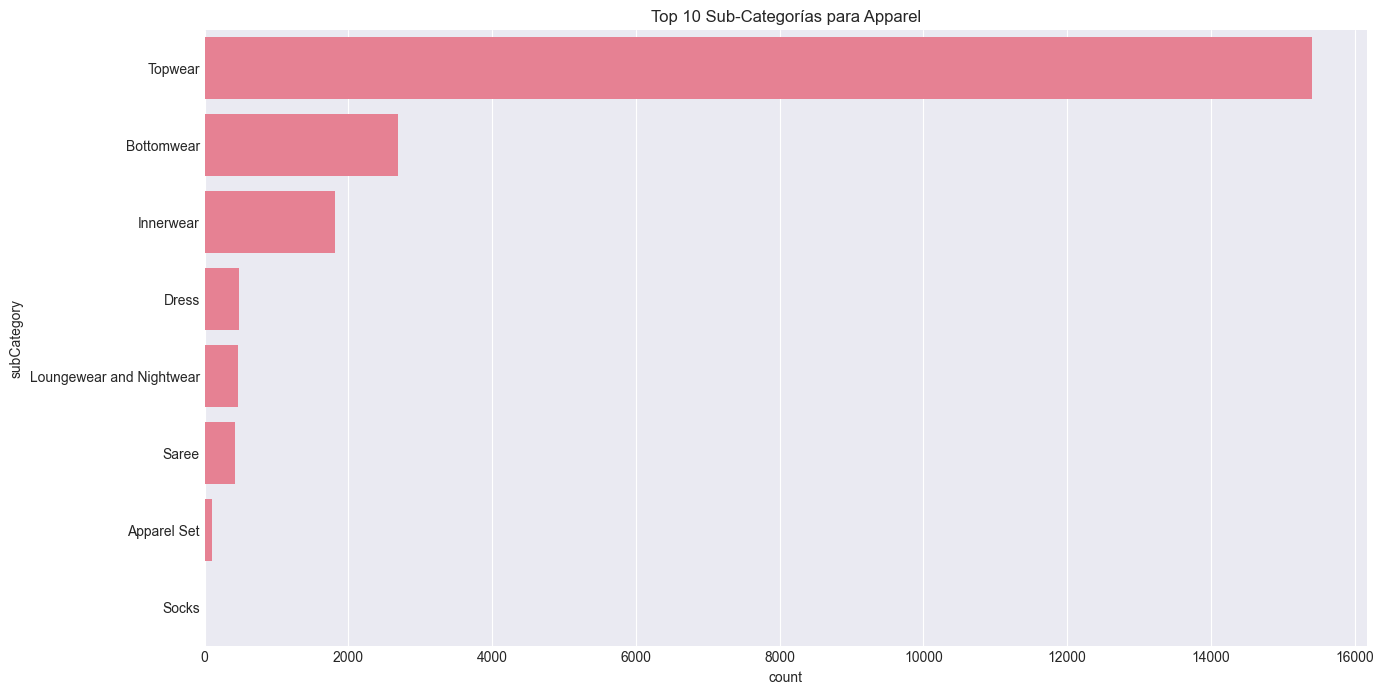


Ejemplos de tipos de artículos en Apparel:

Topwear:
Shirts, Tshirts, Tops, Sweatshirts, Kurtas

Bottomwear:
Jeans, Track Pants, Shorts, Skirts, Trousers

Innerwear:
Bra, Briefs, Innerwear Vests, Camisoles, Boxers

Saree:
Sarees

Dress:
Dresses, Jumpsuit

Loungewear and Nightwear:
Night suits, Bath Robe, Lounge Pants, Nightdress, Baby Dolls

Apparel Set:
Kurta Sets, Clothing Set, Swimwear

Socks:
Socks, Booties

Analizando distribución de colores...


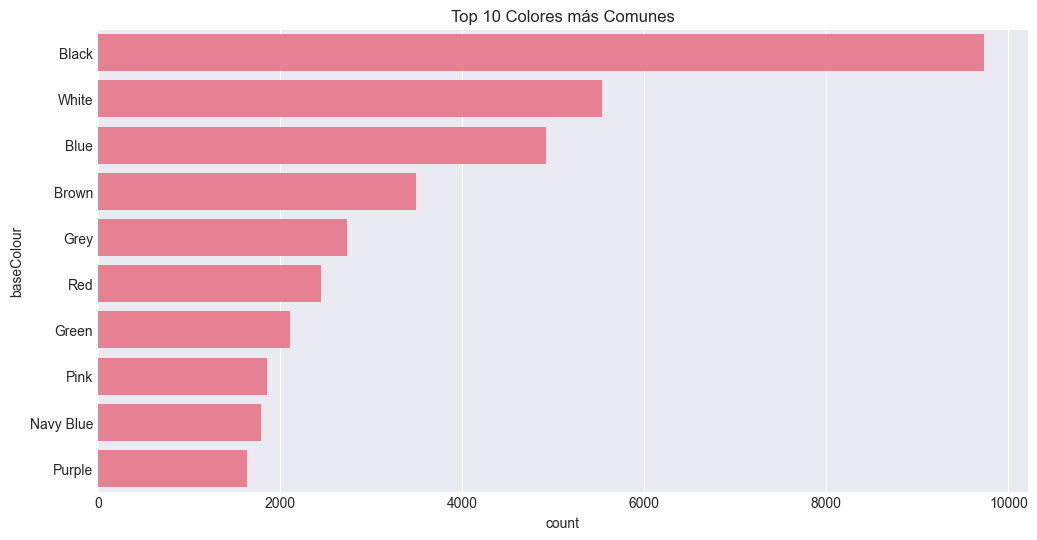

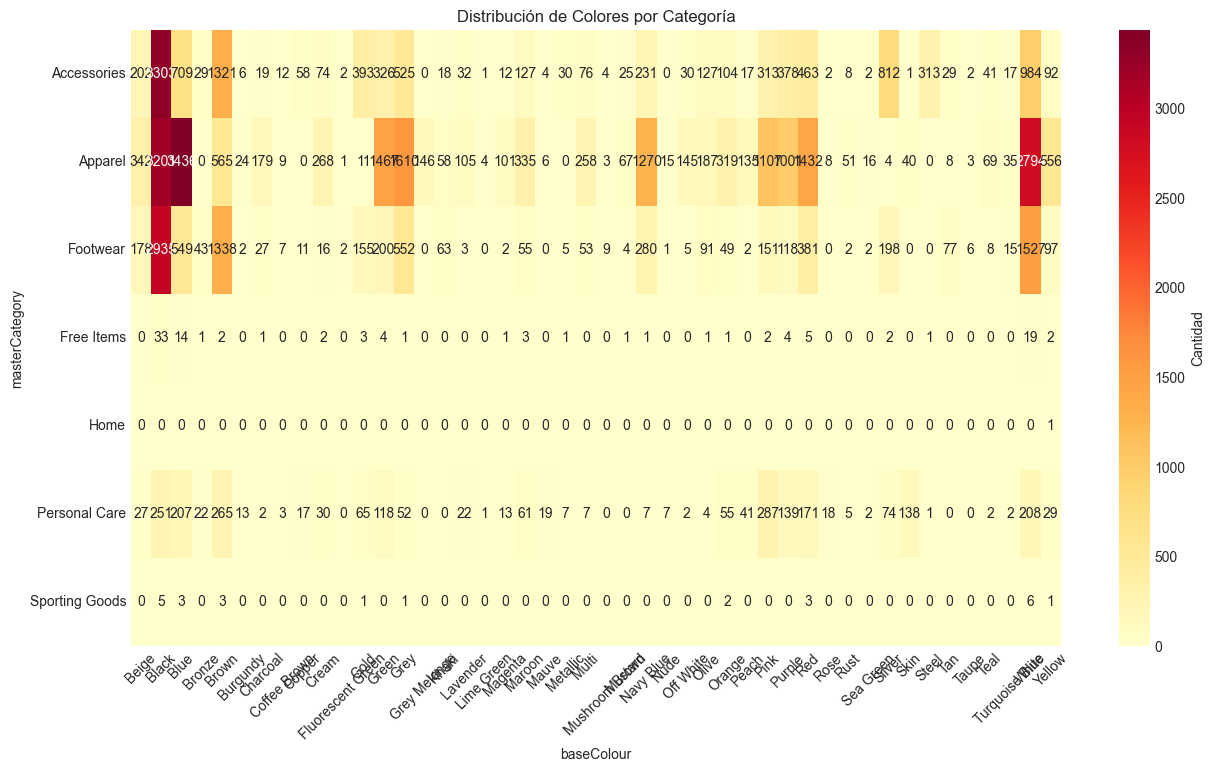


Analizando patrones temporales...


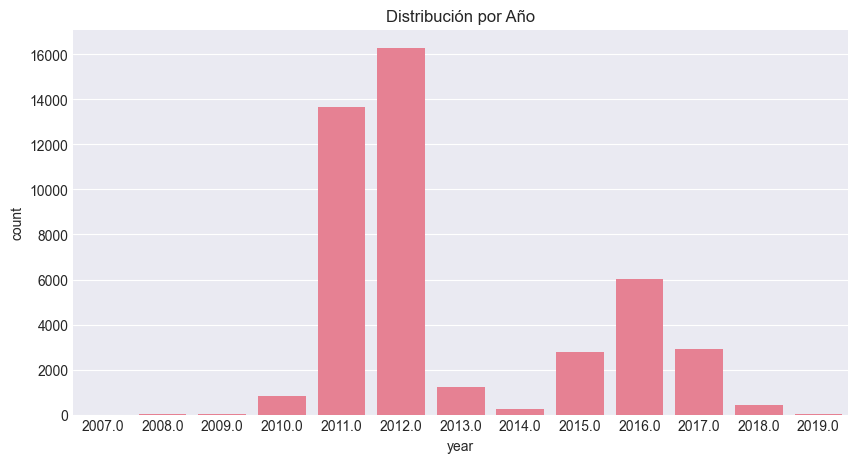

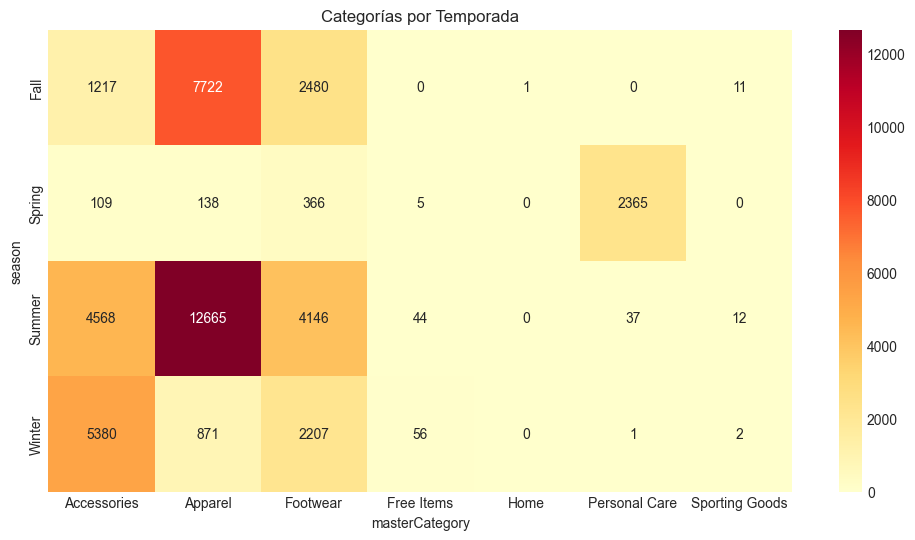


Analizando nombres de productos...
Palabras clave más comunes en los nombres de productos:
men: 21619
women: 15217
black: 9678
shirt: 7599
blue: 6596
white: 5803
t: 5494
shoes: 4087
s: 3816
printed: 3437
brown: 3242
red: 3102
grey: 3044
watch: 2413
nike: 2326
green: 2320
casual: 2297
of: 2111
puma: 2102
adidas: 2081

Analizando patrones de uso...


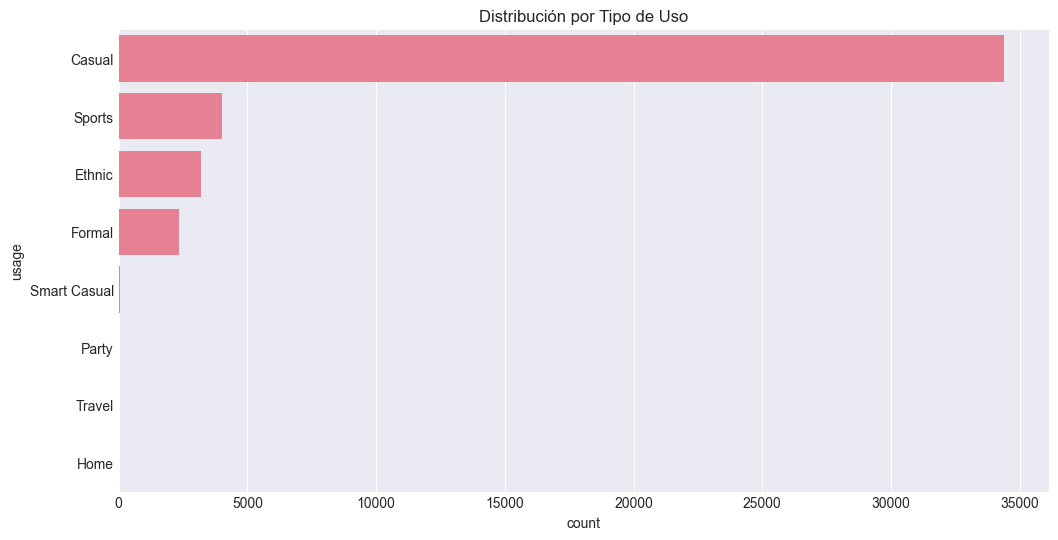

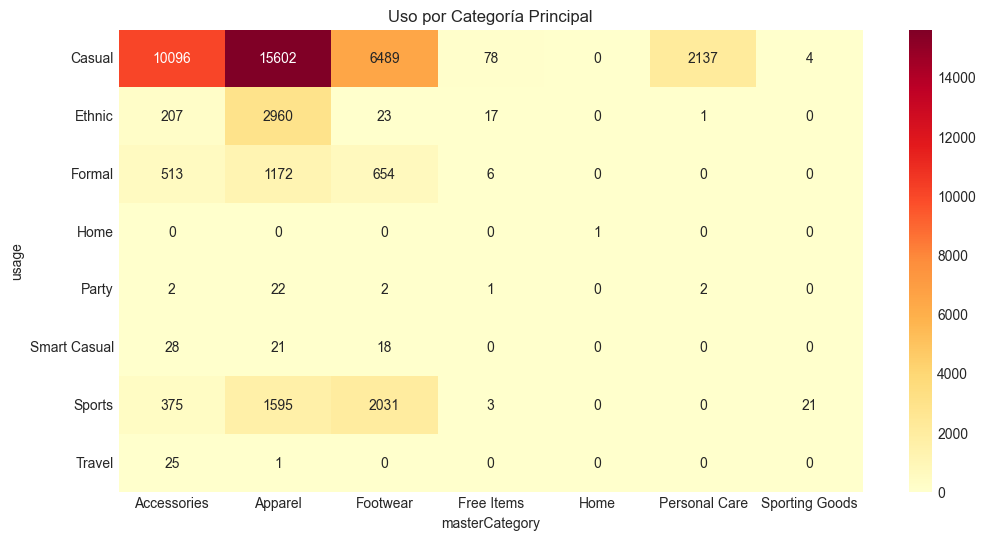

In [10]:
def main():
    print("Iniciando análisis detallado del dataset")
    df = explore_csv()
    
    if df is not None:
        print("\nAnalizando relaciones entre categorías...")
        analyze_category_relationships(df)
        
        print("\nAnalizando distribución de colores...")
        analyze_colors(df)
        
        print("\nAnalizando patrones temporales...")
        analyze_temporal_patterns(df)
        
        print("\nAnalizando nombres de productos...")
        analyze_product_names(df)
        
        print("\nAnalizando patrones de uso...")
        analyze_usage(df)

if __name__ == "__main__":
    main()